In [ ]:

دسته بندی با نوی بایز 

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
%cd /content/drive/MyDrive/news

/content/drive/MyDrive/news


In [63]:
import nltk

2 6
F
art:	0
business:	0
havades:	0
health:	0
maeeshat:	0
siasi:	0
sport:	1
teach:	0
------------
3 0
F
art:	1
business:	0
havades:	0
health:	0
maeeshat:	0
siasi:	0
sport:	0
teach:	0
------------
6 2
F
art:	0
business:	0
havades:	1
health:	0
maeeshat:	0
siasi:	0
sport:	0
teach:	0
------------
6 6
T
art:	0
business:	0
havades:	0
health:	0
maeeshat:	0
siasi:	0
sport:	1
teach:	0
------------
5 4
F
art:	0
business:	0
havades:	0
health:	0
maeeshat:	1
siasi:	0
sport:	0
teach:	0
------------
6 2
F
art:	0
business:	0
havades:	1
health:	0
maeeshat:	0
siasi:	0
sport:	0
teach:	0
------------
3 6
F
art:	0
business:	0
havades:	0
health:	0
maeeshat:	0
siasi:	0
sport:	1
teach:	0
------------
3 1
F
art:	0
business:	1
havades:	0
health:	0
maeeshat:	0
siasi:	0
sport:	0
teach:	0
------------
1 6
F
art:	0
business:	0
havades:	0
health:	0
maeeshat:	0
siasi:	0
sport:	1
teach:	0
------------
0 2
F
art:	0
business:	0
havades:	1
health:	0
maeeshat:	0
siasi:	0
sport:	0
teach:	0
------------
1 6
F
art:	0
busines

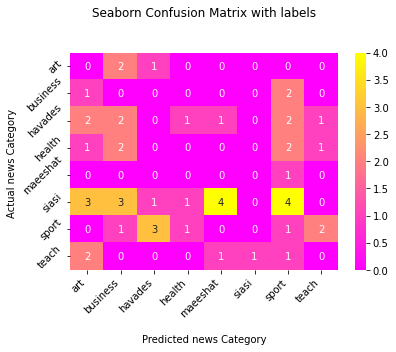

recall_score_avg 0.0196078431372549
recall_score_of: art,business,havades,health,maeeshat,siasi,sport,teach  [0.    0.    0.    0.    0.    0.    0.125 0.   ]
--------------------------------------------------
precision_avg 0.0196078431372549
precision_score_of: art,business,havades,health,maeeshat,siasi,sport,teach [0.         0.         0.         0.         0.         0.
 0.07692308 0.        ]
--------------------------------------------------
accuracy_score 0.0196078431372549
--------------------------------------------------
f1_score_avg 0.0196078431372549
f1_score_of: art,business,havades,health,maeeshat,siasi,sport,teach [0.        0.        0.        0.        0.        0.        0.0952381
 0.       ]


In [72]:
from os import listdir
from os.path import isfile, join
import csv
import random
import string
from nltk.corpus import stopwords
true=[]
pred=[]

def save(filename, dictionary):
    w = csv.writer(open(filename, "w"))
    for key, val in dictionary.items():
        w.writerow([key, val])


def load(filename):
    d = {}
    with open(filename, mode='r') as infile:
        #reader = csv.reader(infile)
        reader = csv.reader(x.replace('\0', '') for x in infile)
        for rows in reader:
            if len(rows) == 2:
                d[rows[0]] = float(rows[1])
    return d


def cleaner(text):
    with open('/content/drive/MyDrive/news/stop-words.txt', "r") as word_list:
      words = word_list.read().split('\n')
    words.append("\u200c")
    words.append("\u200f")
    digits = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    en = ['C','V','B','N','M','Q','W','E','R','T','Y','U','I','O','P','A','S','D','F','G','H','J','K','L','Z','X','q', 'w','e','r','t','y','u','i','o','p','a','s','d','f','g','h','j','k','l','z','x','c','v','b','n','m']
    for q in digits:
      words.append(str(q))
    for e in en:
      words.append(e)
    words=set(words)
    stopWords = words
    text = text.replace('\n', ' ')
    mail = text.split(' ')
    mail = [word for word in mail if word not in stopWords]
    return mail

def train(filename):
    files = [f for f in listdir(filename) if isfile(join(filename, f))]
    dictionary = {}
    counter = 0
    for file in files:
        file = open(filename + "/" + file, errors="ignore")
        text = file.read()
        file.close()
        mail = cleaner(text)
        for word in mail:
            counter += 1
            if word in dictionary:
                dictionary[word] += 1
            else:
                dictionary[word] = 1
    fileCount = len(files)
    for word in dictionary.keys():
        dictionary[word] = float(dictionary[word]) / fileCount
    dictionary["fileCount"] = fileCount
    return dictionary


def classify(input, diction, priori):
    input = cleaner(input)
    p = 1
    for word in input:
        if word in diction.keys():
            p *= diction[word]
        else:
            p *= 1/diction["fileCount"]+len(diction)+1
    p *= priori
    return p


def trainNsave():
    save("art_train_results.csv", train("art"))
    save("business_train_results.csv", train("business"))
    save("havades_train_results.csv", train("havades"))
    save("health_train_results.csv", train("health"))
    save("maeeshat_train_results.csv", train("maeeshat"))
    save("siasi_train_results.csv", train("siasi"))
    save("sport_train_results.csv", train("sport"))
    save("teach_train_results.csv", train("teach"))

def test():
    artDict = load("art_train_results.csv")
    businessDict = load("business_train_results.csv")
    havadesDict = load("havades_train_results.csv")
    healthDict = load("health_train_results.csv")
    maeeshatDict = load("maeeshat_train_results.csv")
    siasiDict = load("siasi_train_results.csv")
    sportDict = load("sport_train_results.csv")
    teachDict = load("teach_train_results.csv")

    files = [f for f in listdir("test") if isfile(join("test", f))]
    artC = businessC = havadesC= healthC = maeeshatC = siasiC = sportC = teachC = 0
    for file in files:
        artC = businessC = havadesC= healthC = maeeshatC = siasiC = sportC = teachC = 0
        file = open("test" + "/" + file, errors = "ignore")
        c=file.name[-5]
        text = file.read()
        file.close()
        art = classify(text, artDict, 1/8)
        business = classify(text, businessDict, 1/8)
        havades = classify(text, havadesDict, 1/8)
        health = classify(text, healthDict, 1/8)
        maeeshat = classify(text, maeeshatDict, 1/8)
        siasi = classify(text, siasiDict, 1/8)
        sport = classify(text, sportDict, 1/8)
        teach = classify(text, teachDict, 1/8)

        result=[art,business,havades,health,maeeshat,siasi,sport,teach]
        max_item = max(result)
        index_list = [index for index in range(len(result)) if result[index] == max_item]
        if len(index_list)==1:
          if index_list[0]==0:
            artC+=1
          if index_list[0]==1:
            businessC+=1
          if index_list[0]==2:
            havadesC+=1
          if index_list[0]==3:
            healthC+=1
          if index_list[0]==4:
            maeeshatC+=1
          if index_list[0]==5:
            siasiC+=1
          if index_list[0]==6:
            sportC+=1
          if index_list[0]==7:
            teachC+=1
        else:
          random_num = random.choice(index_list)
          if random_num==0:
            artC+=1
          if random_num==1:
            businessC+=1
          if random_num==2:
            havadesC+=1
          if random_num==3:
            healthC+=1
          if random_num==4:
            maeeshatC+=1
          if random_num==5:
            siasiC+=1
          if random_num==6:
            sportC+=1
          if random_num==7:
            teachC+=1

        l=[artC,businessC,havadesC,healthC,maeeshatC,siasiC,sportC,teachC]
        max_l = max(l)
        index_l = [index for index in range(len(l)) if l[index] == max_l]
        true.append(int(c)-1)
        pred.append(index_l[0])
        print(str(int(c)-1),str(index_l[0]))
        if str(int(c)-1)==str(index_l[0]):
          print("T")
          

        else:
          print("F")
        
        print("art:\t" + str(artC))
        print("business:\t" + str(businessC))
        print("havades:\t" + str(havadesC))
        print("health:\t" + str(healthC))
        print("maeeshat:\t" + str(maeeshatC))
        print("siasi:\t" + str(siasiC))
        print("sport:\t" + str(sportC))
        print("teach:\t" + str(teachC))
        print("------------")




trainNsave()
test()

from sklearn.metrics import confusion_matrix

#Get the confusion matrix
cf_matrix = confusion_matrix(true, pred)

print(cf_matrix)
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.heatmap(cf_matrix, annot=True,cmap='spring' )

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted news Category')
ax.set_ylabel('Actual news Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['art','business', 'havades','health','maeeshat', 'siasi','sport','teach'])
ax.yaxis.set_ticklabels(['art','business', 'havades','health','maeeshat', 'siasi','sport','teach'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=45, horizontalalignment='right')
## Display the visualization of the Confusion Matrix.
plt.show()

from sklearn.metrics import recall_score,precision_score,accuracy_score,f1_score

print("recall_score_avg",recall_score(true, pred, average='micro'))
print("recall_score_of: art,business,havades,health,maeeshat,siasi,sport,teach ",recall_score(true, pred, average=None))
print("--------------------------------------------------")
print("precision_avg",precision_score(true, pred, average='micro'))
print("precision_score_of: art,business,havades,health,maeeshat,siasi,sport,teach",precision_score(true, pred, average=None))
print("--------------------------------------------------")
print("accuracy_score",accuracy_score(true, pred))
print("--------------------------------------------------")
print("f1_score_avg",f1_score(true, pred, average='micro'))
print("f1_score_of: art,business,havades,health,maeeshat,siasi,sport,teach", f1_score(true, pred, average=None))


⚓

--------------------------------------------------------------------------------